#### PARA PODER LEER EL CSV SE HA GUARDADO EL EXCEL COMO CSV(MACINTOSH) Y LUEGO SE HAN SUSTITUIDO LOS ";" POR "," EN EL CSV DE VSC CON CTRL + F

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
#Carga del dataset 
df_correct = pd.read_csv(r'data/corrected_data.csv')

In [ ]:
#Visualizar las primeras filas del DataFrame
df_correct.head()

,Unnamed: 0,Numero 1,Numero 2,Numero 3,Numero 4,Numero 5,Estrella 1,Estrella 2
0,13/02/2004,16,29,32,36,41,7,9
1,20/02/2004,7,13,39,47,50,2,5
2,27/02/2004,14,18,19,31,37,4,5
3,05/03/2004,4,7,33,37,39,1,5
4,12/03/2004,15,24,28,44,47,4,5


In [ ]:
#Obtener la forma del DataFrame
df_correct.shape

(1881, 8)

In [ ]:
#Obtener información general del DataFrame de los datos cuantitativos
df_correct.describe().round(2)

,Numero 1,Numero 2,Numero 3,Numero 4,Numero 5,Estrella 1,Estrella 2
count,1881.00,1881.00,1881.00,1881.00,1881.00,1881.00,1881.00
mean,8.54,16.89,25.36,34.10,42.64,4.00,8.12
std,6.64,8.22,8.75,8.42,6.66,2.52,2.56
min,1.00,2.00,4.00,9.00,16.00,1.00,2.00
25%,3.00,10.00,19.00,28.00,39.00,2.00,6.00
50%,7.00,16.00,25.00,35.00,44.00,3.00,8.00
75%,12.00,23.00,32.00,41.00,48.00,6.00,10.00
max,38.00,44.00,47.00,49.00,50.00,11.00,12.00


In [ ]:
#Ver los tipos de datos de cada columna
df_correct.dtypes

Unnamed: 0    object
Numero 1       int64
Numero 2       int64
Numero 3       int64
Numero 4       int64
Numero 5       int64
Estrella 1     int64
Estrella 2     int64
dtype: object

In [ ]:
#Información general del DataFrame
df_correct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1881 non-null   object
 1   Numero 1    1881 non-null   int64 
 2   Numero 2    1881 non-null   int64 
 3   Numero 3    1881 non-null   int64 
 4   Numero 4    1881 non-null   int64 
 5   Numero 5    1881 non-null   int64 
 6   Estrella 1  1881 non-null   int64 
 7   Estrella 2  1881 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 117.7+ KB


#### RETOQUES

In [8]:
#Cambio de nombre de la columna Unnamed: 0 a Fecha
df_correct = df_correct.rename(columns={'Unnamed: 0': 'Fecha'})

In [9]:
#Comprobar que las fechas sean correctas, queda pendiente ver si alguna está mal escrita, por ejemplo una fecha en noviembre que en vez de 11 ponga 12.
df_correct['Fecha_check'] = pd.to_datetime( #pd.to_datetime convierte el contendio de la columna 'Fecha' en objetos de tipo fecha (datetime64)
    df_correct['Fecha'],
    dayfirst = True, #indica que el formato es dd/mm/yyyy
    errors = 'coerce' #si la fecha es inválida en vez de lanzar error, la convierte en NaT (Not a Time, valor nulo para fechas)
)

fechas_invalidas = df_correct[df_correct['Fecha_check'].isna()] #isna() devuelve True para valores faltantes o no válidos
print('Filas con fechas inválidas:')
print(fechas_invalidas[['Fecha']])

Filas con fechas inválidas:
           Fecha
1054  31/20/2017


In [ ]:
#Corrección de fechas inválidas
df_correct.loc[df_correct['Fecha'] == '31/20/2017', 'Fecha'] = '31/10/2017' 
#.loc() detecta la fila y columna para hacer el cambio [filtro_filas, columnas],
#donde filtro_filas es df_correct['Fecha'] == '31/20/2017' y columnas es 'Fecha'

In [11]:
#Volver a comprobar las fechas
df_correct['Fecha_check'] = pd.to_datetime(
    df_correct['Fecha'],
    dayfirst = True,
    errors = 'coerce'
)

print(df_correct[df_correct['Fecha_check'].isna()])

Empty DataFrame
Columns: [Fecha, Numero 1, Numero 2, Numero 3, Numero 4, Numero 5, Estrella 1, Estrella 2, Fecha_check]
Index: []


#### RECUENTO DE NUMEROS 

In [ ]:
#Principales
#Recuento de números principales
cols = ["Numero 1", "Numero 2", "Numero 3", "Numero 4", "Numero 5"] 

#Recuento general
numeros_todos = df_correct[cols].stack() #stack apilas las columnas para analizarlas como un solo conjunto
conteo_total = numeros_todos.value_counts().sort_index()
print("=== Recuento total de números:===")
print(conteo_total)

=== Recuento total de números:===
1     181
2     176
3     187
4     189
5     188
6     181
7     192
8     177
9     179
10    203
11    186
12    189
13    192
14    190
15    196
16    184
17    201
18    166
19    211
20    198
21    207
22    148
23    215
24    191
25    197
26    195
27    196
28    181
29    206
30    192
31    178
32    176
33    166
34    188
35    196
36    179
37    200
38    194
39    185
40    171
41    169
42    211
43    172
44    211
45    197
46    165
47    173
48    184
49    191
50    205
Name: count, dtype: int64


In [ ]:
#Guardar el recuento en un archivo Excel, al final del notebook están todas las líneas para guardar los resultados en archivos Excel
#Las líneas correspondentes a estos códigos están para las tablas que me interesan guardar
'''
df_conteo_princ = conteo_total.reset_index()
df_conteo_princ.columns = ['Número', 'Frecuencia']
df_conteo_princ.to_excel("Recuento_numeros_principales.xlsx", index=False)
'''


'\ndf_conteo_princ = conteo_total.reset_index()\ndf_conteo_princ.columns = [\'Número\', \'Frecuencia\']\ndf_conteo_princ.to_excel("Recuento_numeros_principales.xlsx", index=False)\n'

In [14]:
#Recuento de estrellas
cols_est = ["Estrella 1", "Estrella 2"]

#Recuento general
numeros_todos_est = df_correct[cols_est].stack() #stack apilas las columnas para analizarlas como un solo conjunto
conteo_total_est = numeros_todos_est.value_counts().sort_index()
print("=== Recuento total de números:===")
print(conteo_total_est)
'''
df_conteo_est = conteo_total_est.reset_index()
df_conteo_est.columns = ['Número', 'Frecuencia']
df_conteo_est.to_excel("Recuento_numeros_estrellas.xlsx", index=False)
'''


=== Recuento total de números:===
1     325
2     371
3     374
4     299
5     334
6     337
7     337
8     361
9     347
10    264
11    253
12    160
Name: count, dtype: int64


'\ndf_conteo_est = conteo_total_est.reset_index()\ndf_conteo_est.columns = [\'Número\', \'Frecuencia\']\ndf_conteo_est.to_excel("Recuento_numeros_estrellas.xlsx", index=False)\n'

In [ ]:
#Principales
#Recuento por columna 
numeros_posibles = range(1, 51) #Números posibles del Euromillón
tabla_frecuencia_posicion = pd.DataFrame(0, index = numeros_posibles, columns = cols)
#que hay dentor del parentesis: 0, el valor incial de todas las celdas sera 0
#index=numeros_posibles, define las filas de la tabla, por ejemplo los numeros 1,2,3...50
#columns=cols, define las columnas de la tabla, por ejemplo Numero 1, Numero 2...Numero 5

for col in cols:
    conteo_columna = df_correct[col].value_counts()
    tabla_frecuencia_posicion[col] = tabla_frecuencia_posicion.index.map(conteo_columna).fillna(0).astype(int)
#index.mpa(conteo_clumna) toma cada valor de índice (1,2,3...) y busca en conteo_columna cuántas veces aparece, si no aparece devuelve NaN
#fillna(0) reemplaza los NaN por 0
#.astype(int) convierte todos los valores a enteros, aunque creo

#Calcula el total por número
tabla_frecuencia_posicion['Total Principal'] = tabla_frecuencia_posicion.sum(axis=1)

print("\n=== Recuento por columna ===")
print(tabla_frecuencia_posicion)

#tabla_frecuencia_posicion.to_excel("Recuento_numeros_principales_por_columna.xlsx", index=True)


=== Recuento por columna ===
    Numero 1  Numero 2  Numero 3  Numero 4  Numero 5  Total Principal
1        181         0         0         0         0              181
2        165        11         0         0         0              176
3        157        30         0         0         0              187
4        144        44         1         0         0              189
5        135        50         3         0         0              188
6        131        45         5         0         0              181
7        112        73         7         0         0              192
8         91        71        15         0         0              177
9         80        77        21         1         0              179
10        85        83        31         4         0              203
11        68        87        25         6         0              186
12        78        72        36         3         0              189
13        64        73        48         7         0        

In [ ]:
#Estrellas
#Recuento por columna estrellas
numeros_posibles_est = range(1, 13) #Números posibles del Euromillón
tabla_frecuencia_posicion_est = pd.DataFrame(0, index = numeros_posibles_est, columns = cols_est)
#que hay dentor del parentesis: 0, el valor incial de todas las celdas sera 0
#index=numeros_posibles, define las filas de la tabla, por ejemplo los numeros 1,2,3...50
#columns=cols, define las columnas de la tabla, por ejemplo Numero 1, Numero 2...Numero 5

for col in cols_est:
    conteo_columna = df_correct[col].value_counts()
    tabla_frecuencia_posicion_est[col] = tabla_frecuencia_posicion_est.index.map(conteo_columna).fillna(0).astype(int)
#index.mpa(conteo_clumna) toma cada valor de índice (1,2,3...) y busca en conteo_columna cuántas veces aparece, si no aparece devuelve NaN
#fillna(0) reemplaza los NaN por 0
#.astype(int) convierte todos los valores a enteros, aunque creo

#Calcula el total por número
tabla_frecuencia_posicion_est['Total Estrella'] = tabla_frecuencia_posicion_est.sum(axis=1)

print("\n=== Recuento por columna ===")
print(tabla_frecuencia_posicion_est)

#tabla_frecuencia_posicion_est.to_excel("Recuento_numeros_estrellas_por_columna.xlsx", index=True)


=== Recuento por columna ===
    Estrella 1  Estrella 2  Total Estrella
1          325           0             325
2          342          29             371
3          305          69             374
4          209          90             299
5          194         140             334
6          157         180             337
7          118         219             337
8          113         248             361
9           72         275             347
10          32         232             264
11          14         239             253
12           0         160             160


In [17]:
#Calcula el porcentaje de cada columna respecto al total de esa fila
tabla_porcentaje = tabla_frecuencia_posicion[cols].div(
    tabla_frecuencia_posicion['Total Principal'], axis=0) * 100

#Redondear y añadir columna de verificación (suma = 100%)
tabla_porcentaje = tabla_porcentaje.round(2)
tabla_porcentaje['Total Principal %'] = tabla_porcentaje.sum(axis = 1).round(2)
print("\n=== Porcentaje por columna ===")
print(tabla_porcentaje)


=== Porcentaje por columna ===
    Numero 1  Numero 2  Numero 3  Numero 4  Numero 5  Total Principal %
1     100.00      0.00      0.00      0.00      0.00             100.00
2      93.75      6.25      0.00      0.00      0.00             100.00
3      83.96     16.04      0.00      0.00      0.00             100.00
4      76.19     23.28      0.53      0.00      0.00             100.00
5      71.81     26.60      1.60      0.00      0.00             100.01
6      72.38     24.86      2.76      0.00      0.00             100.00
7      58.33     38.02      3.65      0.00      0.00             100.00
8      51.41     40.11      8.47      0.00      0.00              99.99
9      44.69     43.02     11.73      0.56      0.00             100.00
10     41.87     40.89     15.27      1.97      0.00             100.00
11     36.56     46.77     13.44      3.23      0.00             100.00
12     41.27     38.10     19.05      1.59      0.00             100.01
13     33.33     38.02     25.00

In [18]:
#Calcula el porcentaje de cada columna respecto al total de esa fila
tabla_porcentaje_est = tabla_frecuencia_posicion_est[cols_est].div(
    tabla_frecuencia_posicion_est['Total Estrella'], axis=0) * 100

#Redondear y añadir columna de verificación (suma = 100%)
tabla_porcentaje_est = tabla_porcentaje_est.round(2)
tabla_porcentaje_est['Total Estrella %'] = tabla_porcentaje_est.sum(axis = 1).round(2)
print("\n=== Porcentaje por columna ===")
print(tabla_porcentaje_est)


=== Porcentaje por columna ===
    Estrella 1  Estrella 2  Total Estrella %
1       100.00        0.00             100.0
2        92.18        7.82             100.0
3        81.55       18.45             100.0
4        69.90       30.10             100.0
5        58.08       41.92             100.0
6        46.59       53.41             100.0
7        35.01       64.99             100.0
8        31.30       68.70             100.0
9        20.75       79.25             100.0
10       12.12       87.88             100.0
11        5.53       94.47             100.0
12        0.00      100.00             100.0


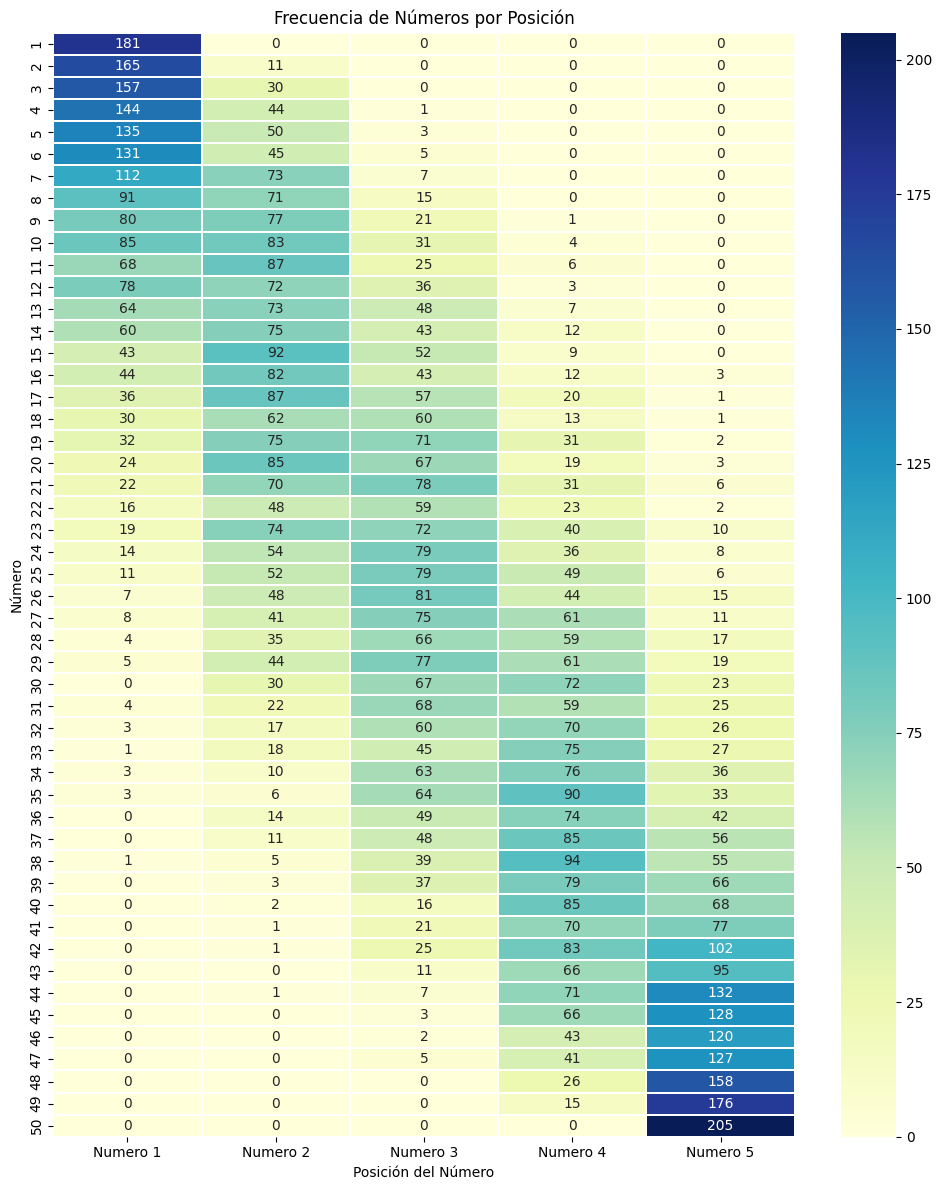

In [19]:
#Heatmap tabla de frecuencia por posición
heatmap_data = tabla_frecuencia_posicion[cols]

plt.figure(figsize = (10, 12))
sns.heatmap(
    heatmap_data,
    cmap = "YlGnBu",
    linewidths = 0.3,
    annot = True,
    fmt = 'd'
)
plt.title('Frecuencia de Números por Posición')
plt.xlabel('Posición del Número')
plt.ylabel('Número')

plt.tight_layout()
plt.show()

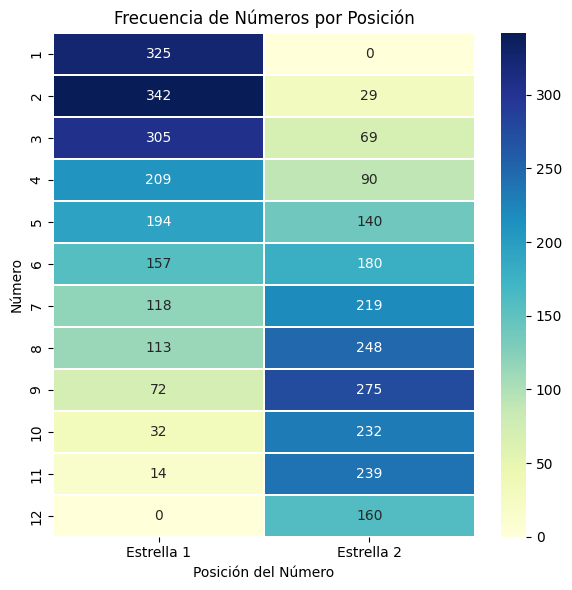

In [20]:
#Heatmap tabla de frecuencia por posición
heatmap_data_est = tabla_frecuencia_posicion_est[cols_est]

plt.figure(figsize = (6, 6))
sns.heatmap(
    heatmap_data_est,
    cmap = "YlGnBu",
    linewidths = 0.3,
    annot = True,
    fmt = 'd'
)
plt.title('Frecuencia de Números por Posición')
plt.xlabel('Posición del Número')
plt.ylabel('Número')

plt.tight_layout()
plt.show()

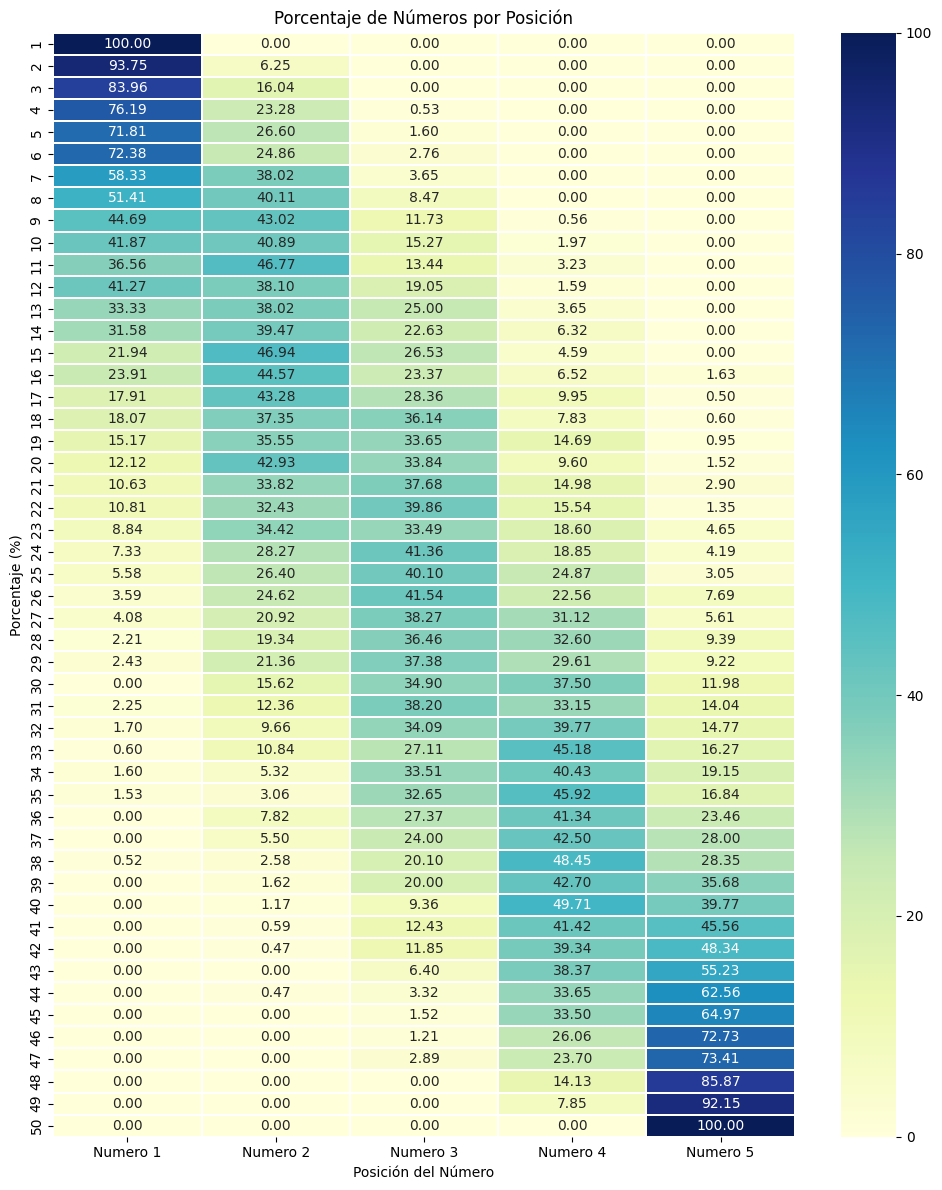

In [21]:
#Heatmap tabla de porcentaje por posición
heatmap_data_pctj = tabla_porcentaje[cols]

plt.figure(figsize = (10, 12))
sns.heatmap(
    heatmap_data_pctj,
    cmap = "YlGnBu",
    linewidths = 0.3,
    annot = True,
    fmt = '.2f' #fmt quiere decir formato, en este caso con 2 decimales, la 'f' es float, la d es de entero
)
plt.title('Porcentaje de Números por Posición')
plt.xlabel('Posición del Número')
plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

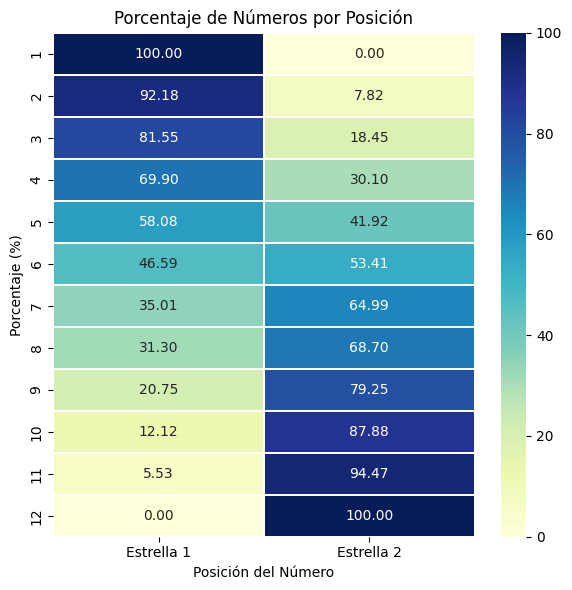

In [22]:
#Heatmap tabla de porcentaje por posición
heatmap_data_pctj_est = tabla_porcentaje_est[cols_est]

plt.figure(figsize = (6, 6))
sns.heatmap(
    heatmap_data_pctj_est,
    cmap = "YlGnBu",
    linewidths = 0.3,
    annot = True,
    fmt = '.2f' #fmt quiere decir formato, en este caso con 2 decimales, la 'f' es float, la d es de entero
)
plt.title('Porcentaje de Números por Posición')
plt.xlabel('Posición del Número')
plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

In [23]:
#Orden de salida de números
orden_numeros = conteo_total.sort_values(ascending=False) #Ordenar de mayor a menor
total = orden_numeros.sum()
#Calcular el porcentaje
porcentaje = (orden_numeros / total *100).round(2)
#Crea un DF para ver la frecuencia y el porcentaje
resultado_princ = pd.DataFrame({
    "Frecuencia": orden_numeros,
    "Porcentaje (%)": porcentaje   
})
print(resultado_princ)

#resultado_princ.to_excel("Porcentaje_numeros_principales_ordenados.xlsx", index=True)

    Frecuencia  Porcentaje (%)
23         215            2.29
19         211            2.24
42         211            2.24
44         211            2.24
21         207            2.20
29         206            2.19
50         205            2.18
10         203            2.16
17         201            2.14
37         200            2.13
20         198            2.11
25         197            2.09
45         197            2.09
15         196            2.08
35         196            2.08
27         196            2.08
26         195            2.07
38         194            2.06
7          192            2.04
13         192            2.04
30         192            2.04
24         191            2.03
49         191            2.03
14         190            2.02
12         189            2.01
4          189            2.01
34         188            2.00
5          188            2.00
3          187            1.99
11         186            1.98
39         185            1.97
48      

In [24]:
#Orden de salida de números
orden_numeros_est = conteo_total_est.sort_values(ascending=False) #Ordenar de mayor a menor
total_est = orden_numeros_est.sum()
#Calcular el porcentaje
porcentaje_est = (orden_numeros_est / total_est *100).round(2)
#Crea un DF para ver la frecuencia y el porcentaje
resultado_est = pd.DataFrame({
    "Frecuencia": orden_numeros_est,
    "Porcentaje (%)": porcentaje_est
})
print(resultado_est)

#resultado_est.to_excel("Porcentaje_numeros_estrellas_ordenados.xlsx", index=True)

    Frecuencia  Porcentaje (%)
3          374            9.94
2          371            9.86
8          361            9.60
9          347            9.22
7          337            8.96
6          337            8.96
5          334            8.88
1          325            8.64
4          299            7.95
10         264            7.02
11         253            6.73
12         160            4.25


#### CUANTO SALE CADA NÚMERO POR AÑO

In [25]:
#Análisis de cuanto sale cada número en relación al año
df_correct['Fecha'] = pd.to_datetime(df_correct['Fecha'], dayfirst = True)

#Extracción del año en una nueva columna
df_correct['Año'] = df_correct['Fecha'].dt.year 

#Apilar números junto con el año
df_correct_apilado = df_correct.melt( #con melt() se convierten las columnas por filas para poder agrupar mejor
    id_vars = 'Año',
    value_vars = cols, #son las columnas a apilar
    var_name = 'Posicion', #Nombre que tomará la columna que indica de que columna original viene el numero
    value_name = 'Numero' #Nombre de la columna que contendrá los valores de esas columnas apiladas
    )

#Conteo de números por año
conteo_por_año = (
    df_correct_apilado
    .groupby(['Año', 'Numero']) #groupby agrupa las filas por año y numero
    .size() #calcula el tamaño de cada grupo, es decir, cuantas veces salio ese numero en ese año
    .reset_index(name='Frecuencia') #convierte el resultado en un DataFrame y nombra la columna del conteo como 'Frecuencia'
)

#Ordenar por año y frecuencia (descendente dentro de cada año)
conteo_por_año = conteo_por_año.sort_values(['Año', 'Frecuencia'], ascending=[True, False])

print(conteo_por_año)

#conteo_por_año.to_excel("Recuento_anual_numeros_principales.xlsx", index=False)

       Año  Numero  Frecuencia
0     2004       1          10
14    2004      15           9
3     2004       4           8
9     2004      10           8
35    2004      37           8
...    ...     ...         ...
1066  2025      22           4
1078  2025      34           4
1055  2025      11           3
1060  2025      16           3
1070  2025      26           3

[1095 rows x 3 columns]


In [26]:
#Análisis de cuanto sale cada estrella en relación al año
df_correct['Fecha'] = pd.to_datetime(df_correct['Fecha'], dayfirst = True)

#Extracción del año en una nueva columna
df_correct['Año'] = df_correct['Fecha'].dt.year 

#Apilar números junto con el año
df_correct_apilado_est = df_correct.melt( #con melt() se convierten las columnas por filas para poder agrupar mejor
    id_vars = 'Año',
    value_vars = cols_est, #son las columnas a apilar
    var_name = 'Posicion', #Nombre que tomará la columna que indica de que columna original viene el numero
    value_name = 'Numero' #Nombre de la columna que contendrá los valores de esas columnas apiladas
    )

#Conteo de números por año
conteo_por_año_est = (
    df_correct_apilado_est
    .groupby(['Año', 'Numero']) #groupby agrupa las filas por año y numero
    .size() #calcula el tamaño de cada grupo, es decir, cuantas veces salio ese numero en ese año
    .reset_index(name='Frecuencia') #convierte el resultado en un DataFrame y nombra la columna del conteo como 'Frecuencia'
)

#Ordenar por año y frecuencia (descendente dentro de cada año)
conteo_por_año_est = conteo_por_año_est.sort_values(['Año', 'Frecuencia'], ascending=[True, False])

print(conteo_por_año_est)

#conteo_por_año_est.to_excel("Recuento_anual_numeros_estrellas.xlsx", index=False)

      Año  Numero  Frecuencia
4    2004       5          15
5    2004       6          13
1    2004       2          12
8    2004       9          11
0    2004       1          10
..    ...     ...         ...
237  2025      12          13
235  2025      10          12
228  2025       3          10
236  2025      11          10
229  2025       4           7

[238 rows x 3 columns]


In [27]:
#Principales
#A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
tabla_frecuencia = df_correct_apilado.pivot_table( #pivot_table crea una tabla a partir de años y numeros.
    index = 'Año', #index es la creacion de las filas, cada año es una fila
    columns = 'Numero', #estipula las columnas, en este caso 'Numero'
    aggfunc = 'size', #como se agregan los valores de cada grupo. Es lo que queremos para frecuencia
    fill_value = 0 #si para Año y Numero no hay datos dejaría Nan, pero con fill_value=0 lo pone a 0
)

print(tabla_frecuencia)

#tabla_frecuencia.to_excel("Recuento_anual_numeros_principales_pivot.xlsx", index=True)

Numero  1   2   3   4   5   6   7   8   9   10  ...  41  42  43  44  45  46  \
Año                                             ...                           
2004    10   3   5   8   4   5   5   4   4   8  ...   5   4   5   6   3   1   
2005     6   4   9   4   1   8   5   7   3   4  ...   5   8   6   5   3   2   
2006     8   4   8   5   8   6   4   8   9   7  ...   4   1   5   7   6   2   
2007     4   6   6   4   6   3   7   4   5   3  ...   9   6   5   5   7   3   
2008     3   7   3   6   5   4   9   6   8   5  ...   4   3   0   5  10   4   
2009     0   3   1   8   8   7   4   5   7   2  ...   4   7   5   5   2   7   
2010     7   5   5  10   4   4   5   4   9   2  ...   3   7   8   4   5  11   
2011     9   7   5   9   7   8   5   4   6   6  ...   8   8   3   9  12   7   
2012    13   7  13  12   8  11   8   8   8  19  ...   9  10  12  17   6   8   
2013    12   8   7  13  12  11  12   7   6  12  ...   9  16  14  13  10   3   
2014    10   8  14  14  13   8  11  10   6   9  ... 

In [28]:
#Estrellas
#A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
tabla_frecuencia_est = df_correct_apilado_est.pivot_table( #pivot_table crea una tabla a partir de años y numeros.
    index = 'Año', #index es la creacion de las filas, cada año es una fila
    columns = 'Numero', #estipula las columnas, en este caso 'Numero'
    aggfunc = 'size', #como se agregan los valores de cada grupo. Es lo que queremos para frecuencia
    fill_value = 0 #si para Año y Numero no hay datos dejaría Nan, pero con fill_value=0 lo pone a 0
)

print(tabla_frecuencia_est)
#tabla_frecuencia_est.to_excel("Recuento_anual_numeros_estrellas_pivot.xlsx", index=True)

Numero  1   2   3   4   5   6   7   8   9   10  11  12
Año                                                   
2004    10  12   8   7  15  13   8  10  11   0   0   0
2005    17   5  14  11  10  12  14  10  11   0   0   0
2006    13  12  15   8  12  13  13  10   8   0   0   0
2007    12  11  13   7  11  14  11  14  11   0   0   0
2008    10   9  11  14  14  10  14  13   9   0   0   0
2009    11  12  15  10  15  14   6   9  12   0   0   0
2010    11   8  14  12   8   9  18  13  13   0   0   0
2011    14  21  17  14  20   9  17  20  16  11  13   0
2012    14  26  21  14  18  14  15  22  22  23  19   0
2013    18  24  16  22  23  18  17  12  21  21  18   0
2014    23  18  17  16  20  12  19  21  19  23  20   0
2015    18  13  19  10  10  18  19  33  23  27  18   0
2016    18  28  15  16  18  16  16  19  20  21  20   3
2017    14  19  26  19  21  13  14  17  23  16  12  14
2018    15  18  20  21  11  16  13  19  15  11  21  28
2019    15  27  17  17  16  26  20  17  10  16  17  12
2020    16

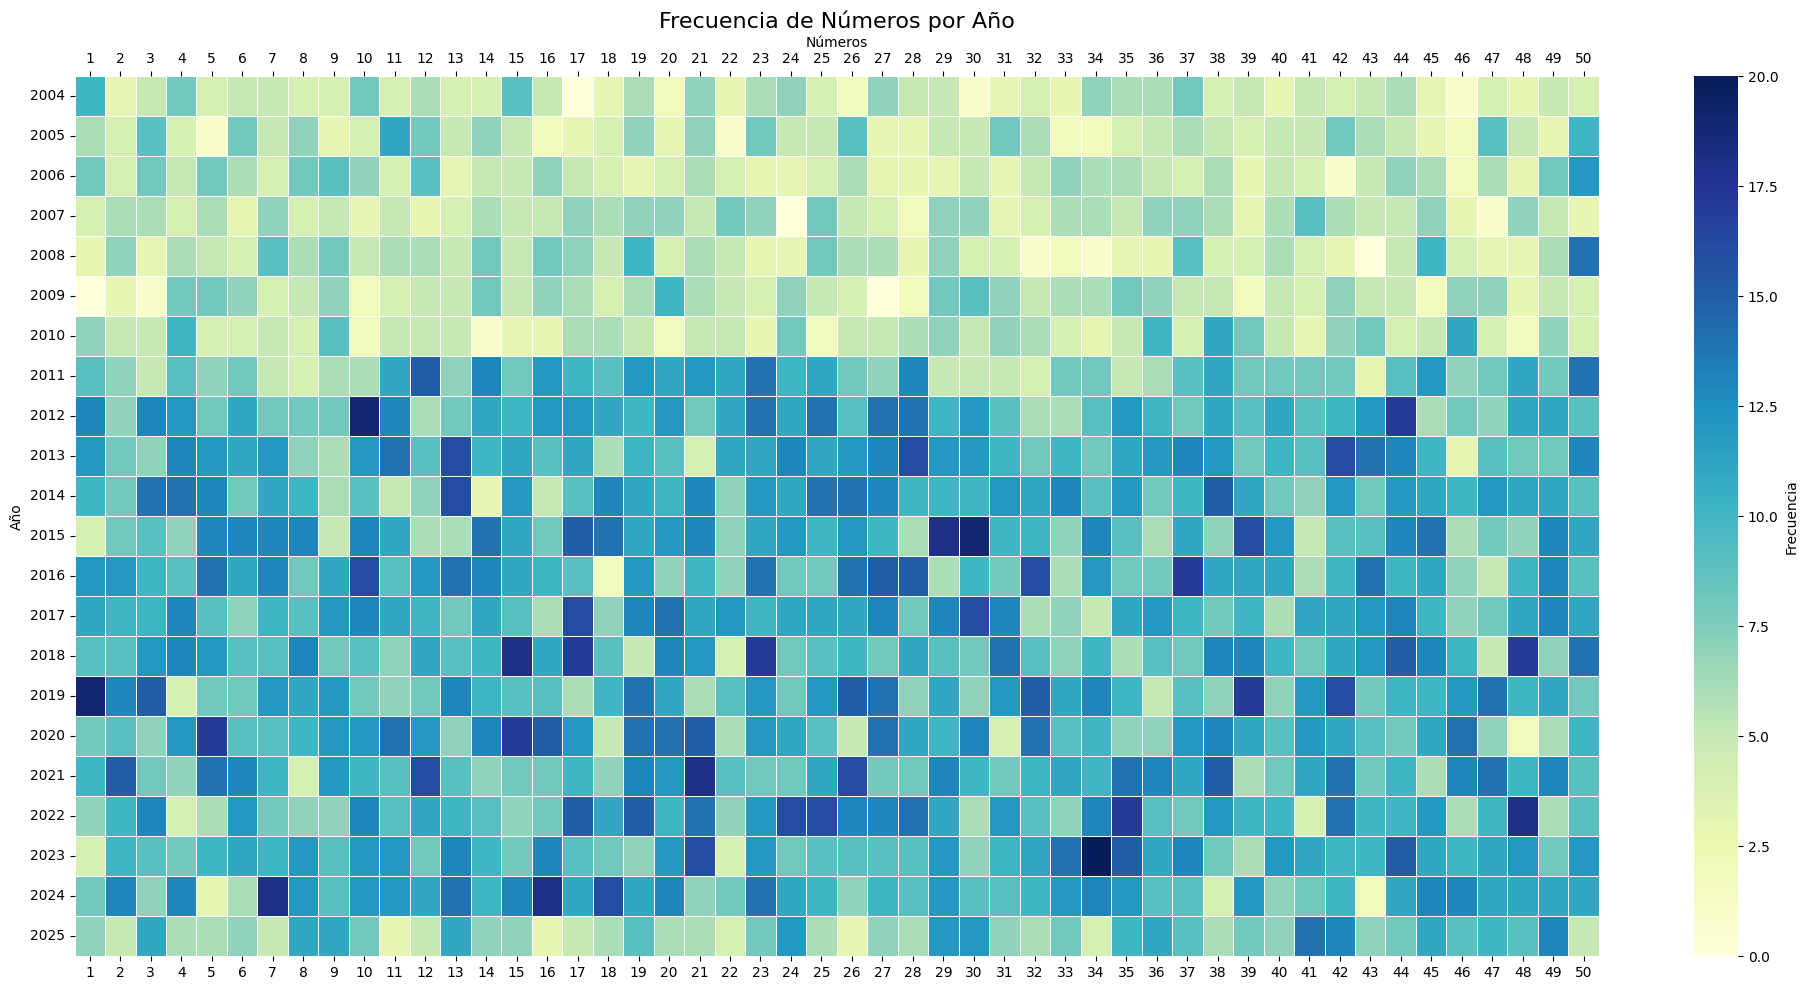

In [29]:
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(20, 10))
sns.heatmap(
    tabla_frecuencia,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Números por Año', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_frecuencia.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Números')
ax.set_ylabel('Año')

plt.tight_layout()
plt.show()

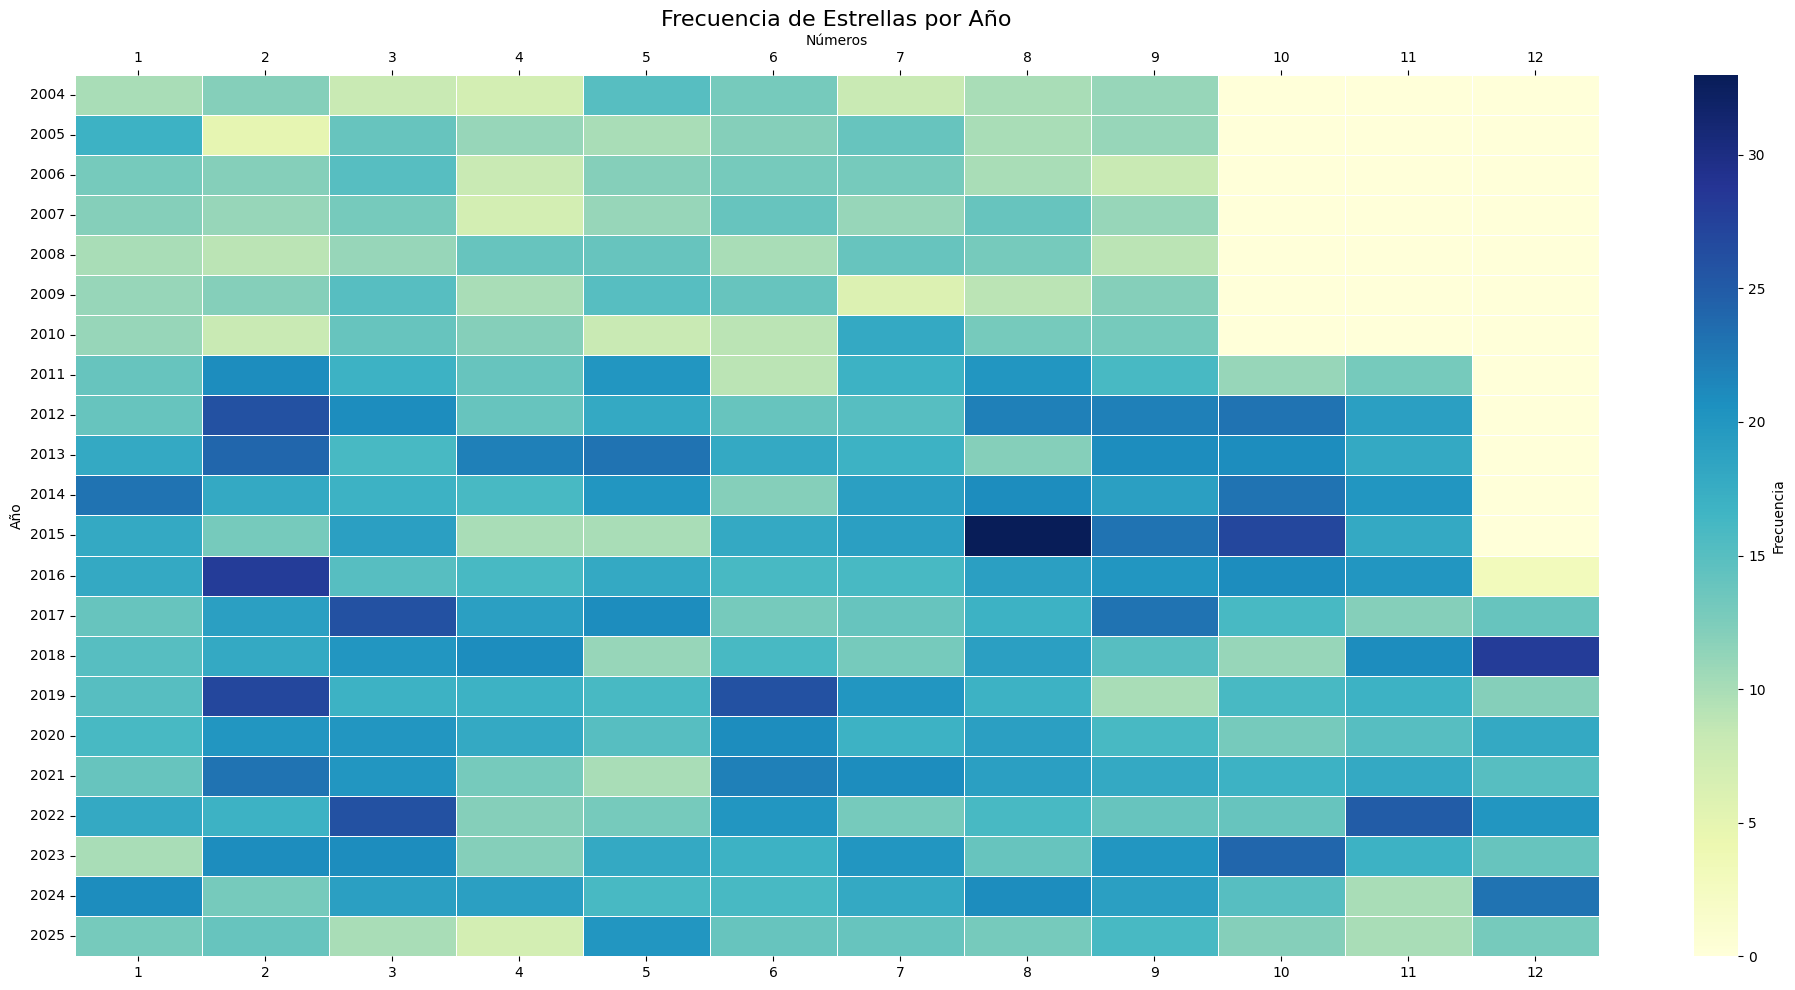

In [30]:
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(20, 10))
sns.heatmap(
    tabla_frecuencia_est,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Estrellas por Año', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_frecuencia_est.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Números')
ax.set_ylabel('Año')

plt.tight_layout()
plt.show()

#### CUANTO SALE CADA NUMERO POR MES

In [31]:
#Principales
#Extracción del mes en una nueva columna
df_correct['Mes'] = df_correct['Fecha'].dt.month

#Apilar números junto con el mes
df_correct_apilado_mes = df_correct.melt( #con melt() se convierten las columnas por filas para poder agrupar mejor
    id_vars = 'Mes',
    value_vars = cols, #son las columnas a apilar
    var_name = 'Posicion', #Nombre que tomará la columna que indica de que columna original viene el numero
    value_name = 'Numero' #Nombre de la columna que contendrá los valores de esas columnas apiladas
)

#Conteo de números por mes
conteo_por_mes = (
    df_correct_apilado_mes
    .groupby(['Mes', 'Numero']) #groupby agrupa las filas por mes y numero
    .size() #calcula el tamaño de cada grupo, es decir, cuantas veces salio ese numero en ese mes
    .reset_index(name = 'Frecuencia') #convierte el resultado en un DataFrame y nombra la columna del conteo como 'Frecuencia'
    )

tabla_mes_numero = conteo_por_mes.pivot_table(
    index = 'Mes',
    columns = 'Numero',
    values = 'Frecuencia',
    fill_value = 0
)

tabla_mes_numero = tabla_mes_numero.astype(int)

print(tabla_mes_numero)
#tabla_mes_numero.to_excel("Recuento_mensual_numeros_principales_pivot.xlsx", index=True)

Numero  1   2   3   4   5   6   7   8   9   10  ...  41  42  43  44  45  46  \
Mes                                             ...                           
1       13  17  14  16  16  18  10  16  15  24  ...  17  17  10  24  16  14   
2        9  11  22  14  13   9   9  10  12  15  ...  12  16  15  16  18  18   
3       17  14  18  22  16  16  14  15  18  16  ...   5  18  20  23  10  18   
4       18  13  14  14  14  16  13  12  12  18  ...  16   8  11  19  20  19   
5       11  11  21  15  21  17  20  23  19  13  ...  17  13  13  11  19  11   
6       15  13  13  11  16  16  24  14  12  15  ...  17  12  14  16  15  10   
7       17  18  14  20  18  12  18  17  19  13  ...  18  17  16  12  18  16   
8       17  20  11  18  20  14  19  10  17  19  ...  12  32  14  20  17  16   
9       15   9  13  15  15  21  21  18  16  20  ...  17  20  13  20  21   6   
10      16  15  13  18  13  13  15  10  14  16  ...  14  19  15  16  19  13   
11      13  16  16   9  14  13  17  14  12  20  ... 

In [32]:
#Estrellas
#Extracción del mes en una nueva columna
df_correct['Mes'] = df_correct['Fecha'].dt.month

#Apilar números junto con el mes
df_correct_apilado_mes_est = df_correct.melt( #con melt() se convierten las columnas por filas para poder agrupar mejor
    id_vars = 'Mes',
    value_vars = cols_est, #son las columnas a apilar
    var_name = 'Posicion', #Nombre que tomará la columna que indica de que columna original viene el numero
    value_name = 'Numero' #Nombre de la columna que contendrá los valores de esas columnas apiladas
)

#Conteo de números por mes
conteo_por_mes_est = (
    df_correct_apilado_mes_est
    .groupby(['Mes', 'Numero']) #groupby agrupa las filas por mes y numero
    .size() #calcula el tamaño de cada grupo, es decir, cuantas veces salio ese numero en ese mes
    .reset_index(name = 'Frecuencia') #convierte el resultado en un DataFrame y nombra la columna del conteo como 'Frecuencia'
    )

tabla_mes_numero_est = conteo_por_mes_est.pivot_table(
    index = 'Mes',
    columns = 'Numero',
    values = 'Frecuencia',
    fill_value = 0
)

tabla_mes_numero_est = tabla_mes_numero_est.astype(int)

print(tabla_mes_numero_est)
#tabla_mes_numero_est.to_excel("Recuento_mensual_numeros_estrellas_pivot.xlsx", index=True)

Numero  1   2   3   4   5   6   7   8   9   10  11  12
Mes                                                   
1       25  24  28  30  29  35  25  36  27  22  15  14
2       22  30  28  22  21  27  33  18  34  26  19   8
3       25  26  21  23  26  36  26  31  31  26  27  18
4       31  35  28  23  33  27  27  29  20  22  27  10
5       24  31  32  30  29  37  29  28  38  15  26  11
6       32  31  31  17  26  20  35  28  31  21  27  11
7       21  28  36  32  26  33  31  38  31  28  18   8
8       23  29  26  29  37  29  25  36  23  29  22  18
9       34  33  37  26  26  20  32  30  33  14  16  17
10      32  27  41  18  31  30  14  35  29  21  19  13
11      31  39  31  23  24  23  26  27  25  19  18  14
12      25  38  35  26  26  20  34  25  25  21  19  18


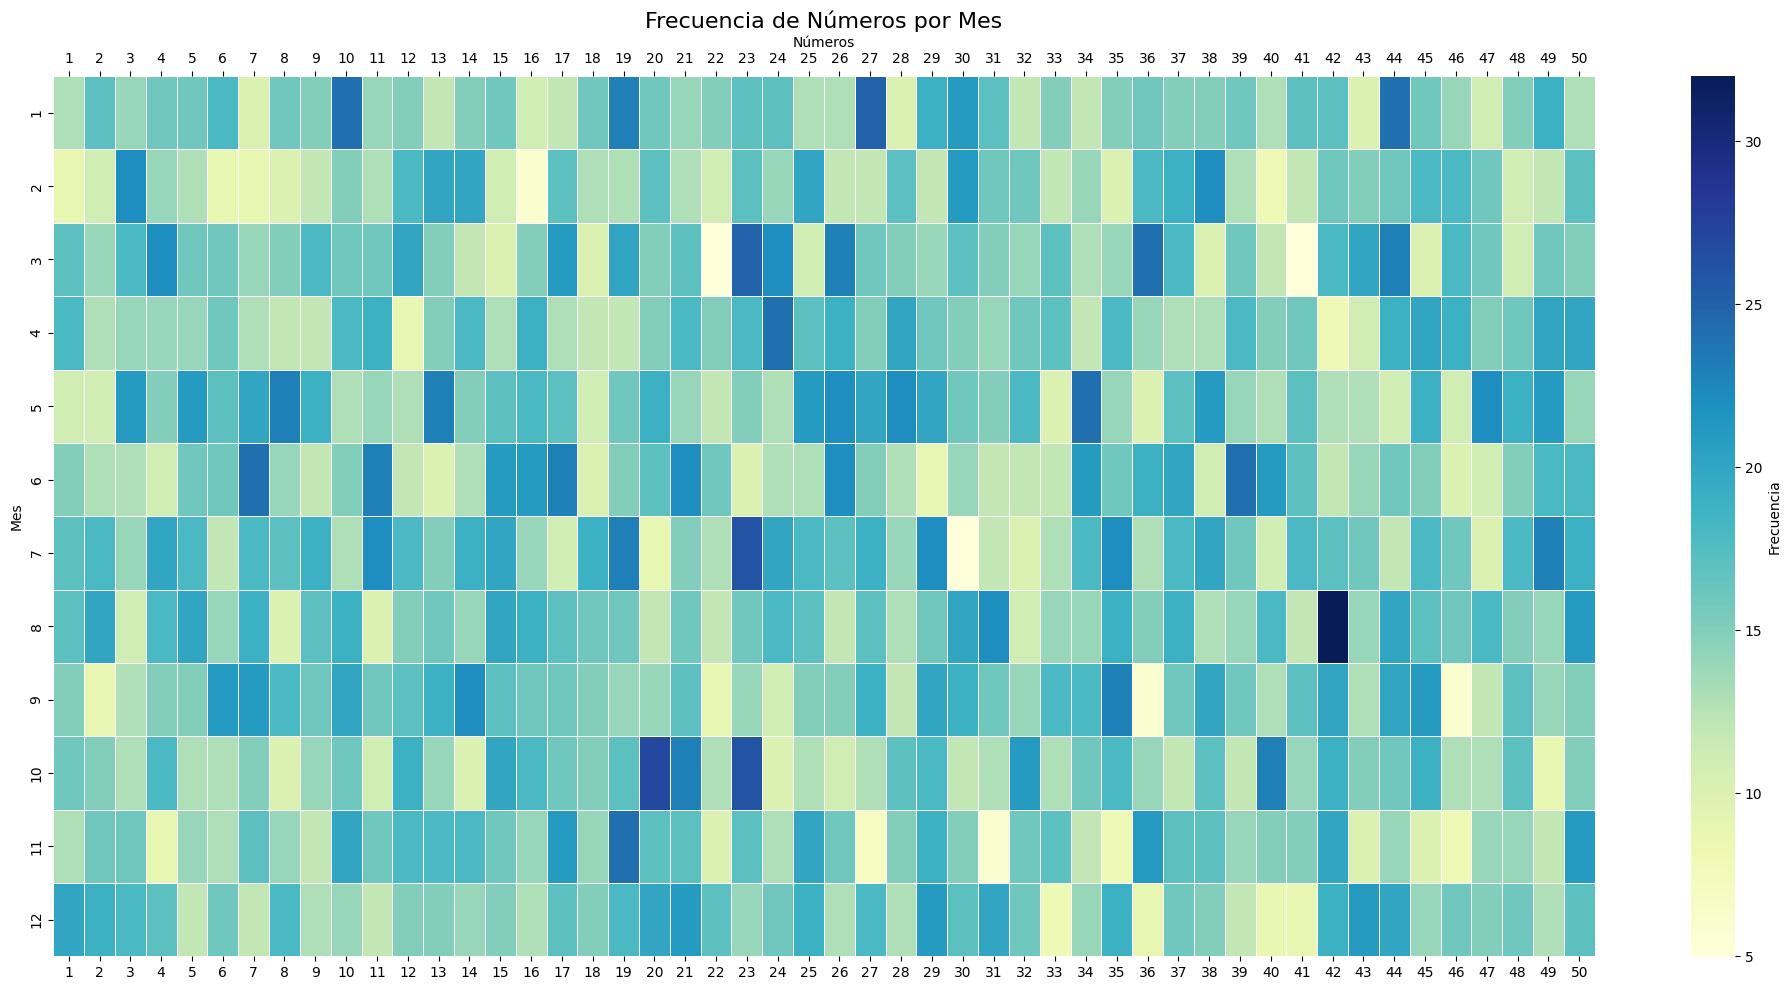

In [33]:
#Principales
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(20, 10))
sns.heatmap(
    tabla_mes_numero,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Números por Mes', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_mes_numero.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Números')
ax.set_ylabel('Mes')

plt.tight_layout()
plt.show()

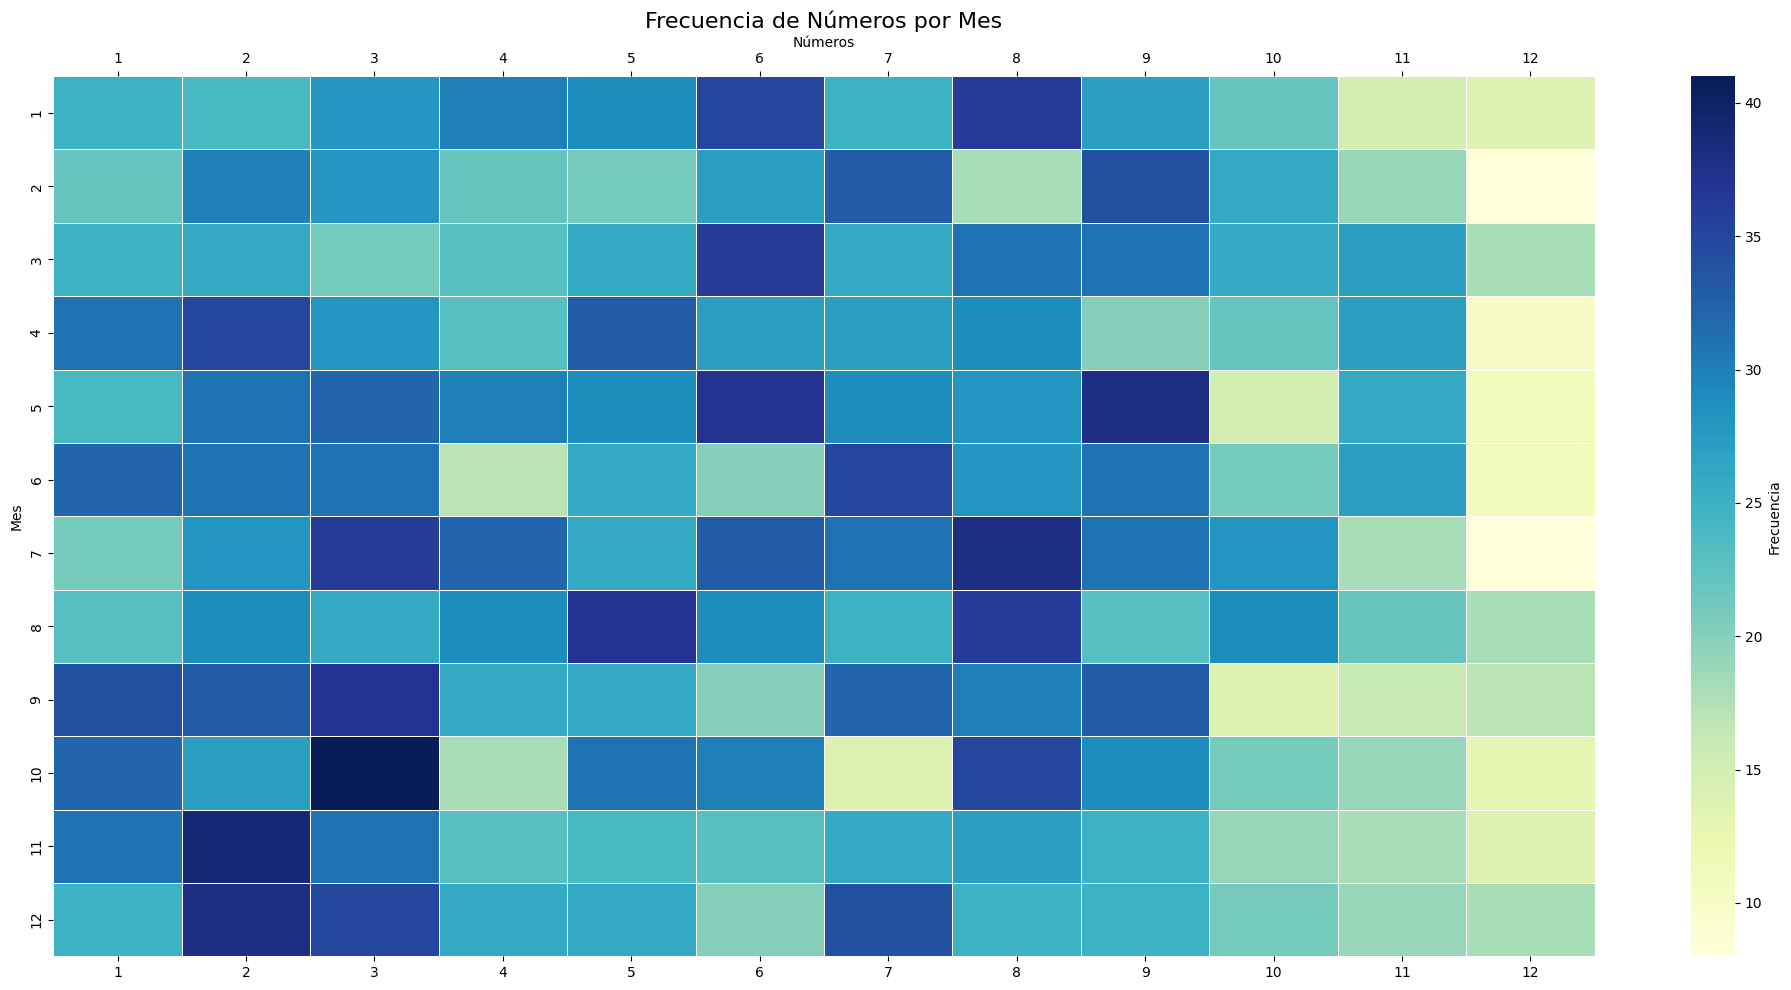

In [34]:
#Estrellas
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(20, 10))
sns.heatmap(
    tabla_mes_numero_est,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Números por Mes', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_mes_numero_est.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Números')
ax.set_ylabel('Mes')

plt.tight_layout()
plt.show()

In [35]:
#Creacion del mapa de calor con la tabla girada. 
tabla_mes_numero_girada = tabla_mes_numero.T

In [36]:
#Creacion del mapa de calor con la tabla girada. 
tabla_mes_numero_girada_est = tabla_mes_numero_est.T

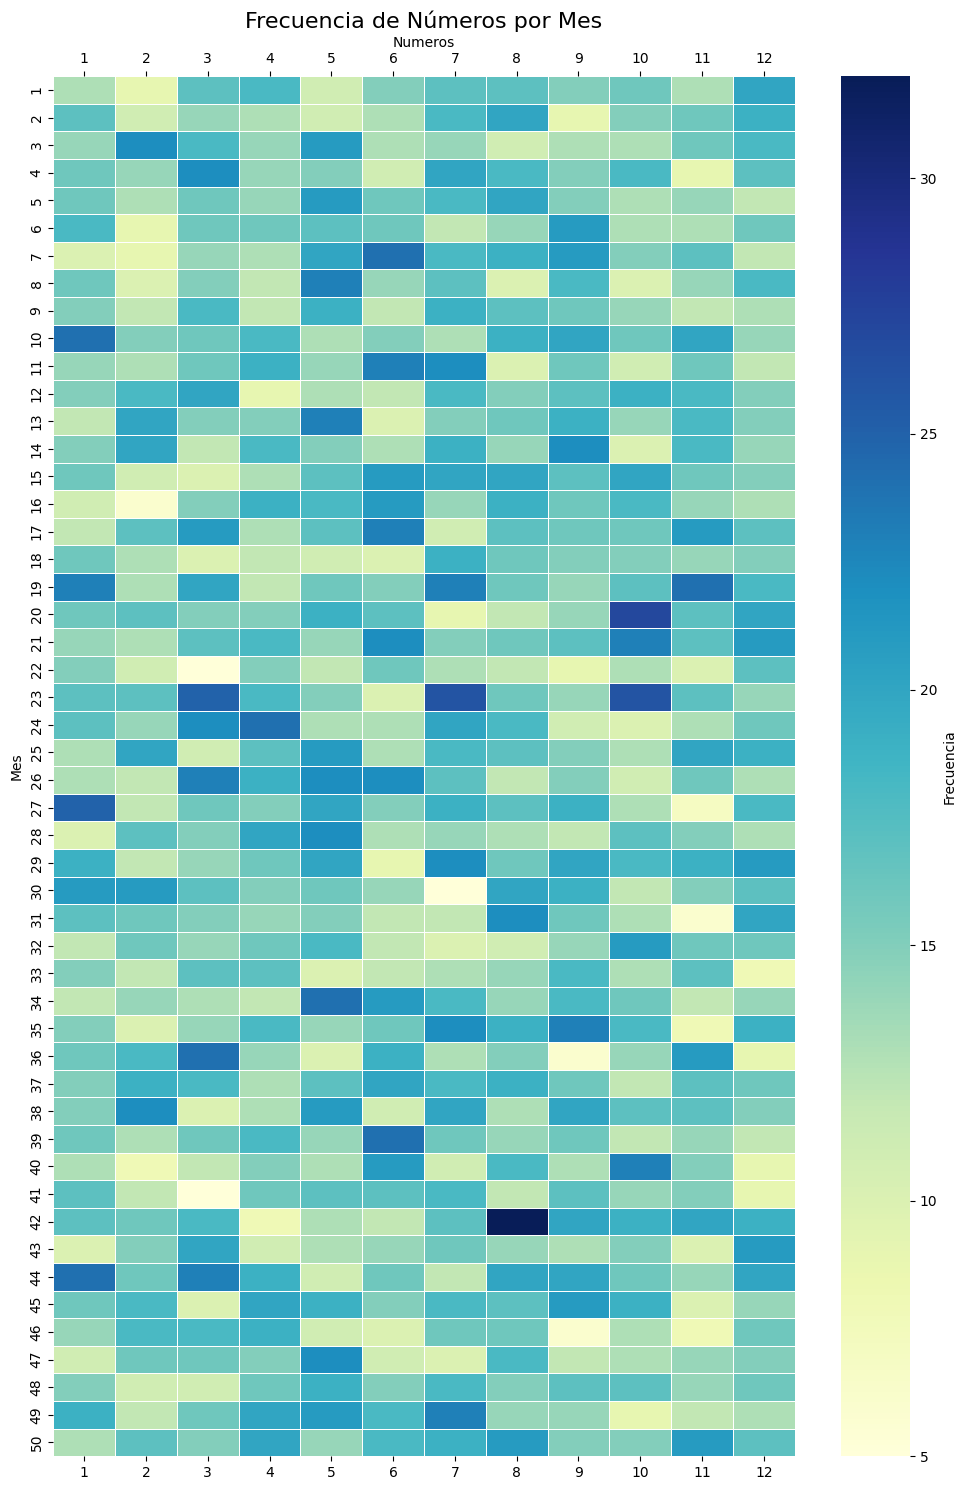

In [ ]:
#Principales
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(10, 15))
sns.heatmap(
    tabla_mes_numero_girada,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Números por Mes', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_mes_numero_girada.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Mes')
ax.set_ylabel('Número')

plt.tight_layout()
plt.show()

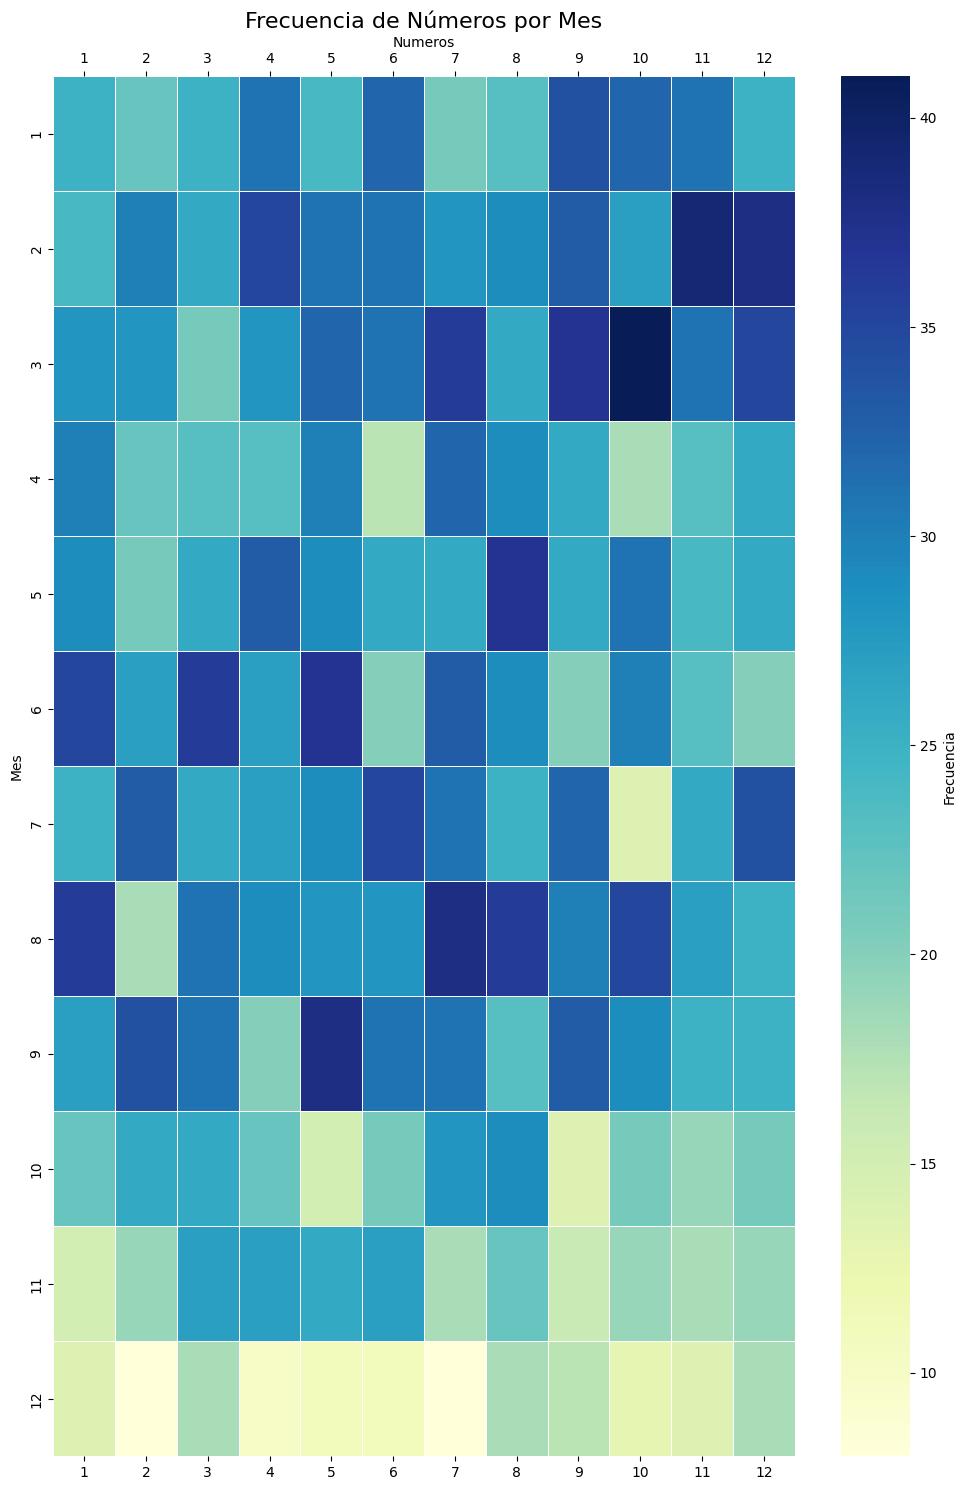

In [ ]:
#Estrellas
#Creacion del mapa de calor. A tener en cuenta que a partir del 2011 pasan a ser dos sorteos por semana, con lo que la frecuencia de los números aumenta.
plt.figure(figsize=(10, 15))
sns.heatmap(
    tabla_mes_numero_girada_est,
    cmap = "YlGnBu",
    linewidths = 0.5, #parámetro de sns.heatmap, indica el grosor de las líneas que separan las celdas
    cbar_kws = {'label': 'Frecuencia'} #cbar es color barra lateral, al añadirel kws permite añadirle opciones como un diccionario, label es la etiqueta que tendrá la barra
)
plt.title('Frecuencia de Números por Mes', fontsize = 16)

ax = plt.gca() #plt.gca() significa "get current axes", obtiene el eje actual del gráfico. Un ax es el area del grafico dentro de la figura
ax.set_xticks(np.arange(len(tabla_mes_numero_girada_est.columns)) + 0.5)
ax.tick_params(axis = 'x', top = True, bottom = True, labeltop = True, labelbottom = True)
#bottom=True → muestra ticks (y etiquetas) abajo.
#top=True → muestra ticks arriba.
#labeltop=True → muestra las etiquetas de los ticks (los números) arriba.
#labelbottom=True → muestra las etiquetas de los ticks abajo.
ax.xaxis.set_label_position('top') #mueve el nombre del eje 'x' arriba
ax.set_xlabel('Mes')
ax.set_ylabel('Número')

plt.tight_layout()
plt.show()

#### DIFERENCIA DE NUMEROS POR MES Y GENERAL

In [39]:
#Principales
#Total global de apariciones
total_global = len(df_correct_apilado_mes)

#Diccionario para guardar las tablas por número
tablas_por_numero = {}

#Generacion de tabla por cada número del 1 al 50
for numero in range(1, 51):
    #Filtar filas donde el número corresponde
    df_numero_mes_vs_general = df_correct_apilado_mes[df_correct_apilado_mes['Numero'] == numero]
    #Contar las apariciones del numero por mes
    conteo_por_mes = df_numero_mes_vs_general['Mes'].value_counts().sort_index()
    #Crear una tabla para todos los meses
    tabla_mensual = pd.DataFrame(index=range(1, 13))
    tabla_mensual.index.name = 'Mes'
    tabla_mensual['Frecuencia'] = tabla_mensual.index.map(conteo_por_mes).fillna(0).astype(int)
    #Calcular porcentaje respecto al total global
    tabla_mensual['Porcentaje_global'] = (tabla_mensual['Frecuencia']/total_global*100).round(4)
    #Añadir informacion columnas
    tabla_mensual['Número'] = numero
    tabla_mensual['Total_apariciones'] = tabla_mensual['Frecuencia'].sum()
    #Reordenar columnas, va con doble llave porque la primera llave es para indexar el DF y la seguna para indicar las columnas
    tabla_mensual = tabla_mensual[['Número', 'Frecuencia', 'Porcentaje_global', 'Total_apariciones']]

    #Guardar la tabla en el diccionario
    tablas_por_numero[numero] = tabla_mensual

print(tablas_por_numero)

'''
with pd.ExcelWriter("Recuento_mensual_por_numero_princ.xlsx") as writer:
    for numero, tabla in tablas_por_numero.items():
        nombre_hoja = f"Número_{numero}"
        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)
'''

{1:      Número  Frecuencia  Porcentaje_global  Total_apariciones
Mes                                                          
1         1          13             0.1382                181
2         1           9             0.0957                181
3         1          17             0.1808                181
4         1          18             0.1914                181
5         1          11             0.1170                181
6         1          15             0.1595                181
7         1          17             0.1808                181
8         1          17             0.1808                181
9         1          15             0.1595                181
10        1          16             0.1701                181
11        1          13             0.1382                181
12        1          20             0.2127                181, 2:      Número  Frecuencia  Porcentaje_global  Total_apariciones
Mes                                                          


'\nwith pd.ExcelWriter("Recuento_mensual_por_numero_princ.xlsx") as writer:\n    for numero, tabla in tablas_por_numero.items():\n        nombre_hoja = f"Número_{numero}"\n        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)\n'

In [40]:
#Estrellas
#Total global de apariciones
total_global_est = len(df_correct_apilado_mes_est)

#Diccionario para guardar las tablas por número
tablas_por_numero_est = {}

#Generacion de tabla por cada número del 1 al 12
for numero in range(1, 13):
    #Filtar filas donde el número corresponde
    df_numero_mes_vs_general_est = df_correct_apilado_mes_est[df_correct_apilado_mes_est['Numero'] == numero]
    #Contar las apariciones del numero por mes
    conteo_por_mes_est = df_numero_mes_vs_general_est['Mes'].value_counts().sort_index()
    #Crear una tabla para todos los meses
    tabla_mensual_est = pd.DataFrame(index=range(1, 13))
    tabla_mensual_est.index.name = 'Mes'
    tabla_mensual_est['Frecuencia Estrella'] = tabla_mensual_est.index.map(conteo_por_mes_est).fillna(0).astype(int)
    #Calcular porcentaje respecto al total global
    tabla_mensual_est['Porcentaje Global Estrella'] = (tabla_mensual_est['Frecuencia Estrella']/total_global_est*100).round(4)
    #Añadir informacion columnas
    tabla_mensual_est['Numero'] = numero
    tabla_mensual_est['Total Apariciones Estrella'] = tabla_mensual_est['Frecuencia Estrella'].sum()
    #Reordenar columnas, va con doble llave porque la primera llave es para indexar el DF y la seguna para indicar las columnas
    tabla_mensual_est = tabla_mensual_est[['Numero', 'Frecuencia Estrella', 'Porcentaje Global Estrella', 'Total Apariciones Estrella']]

    #Guardar la tabla en el diccionario
    tablas_por_numero_est[numero] = tabla_mensual_est

print(tablas_por_numero_est)

'''
with pd.ExcelWriter("Recuento_mensual_por_numero_est.xlsx") as writer:
    for numero, tabla in tablas_por_numero_est.items():
        nombre_hoja = f"Número_{numero}"
        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)
'''

{1:      Numero  Frecuencia Estrella  Porcentaje Global Estrella  \
Mes                                                            
1         1                   25                      0.6645   
2         1                   22                      0.5848   
3         1                   25                      0.6645   
4         1                   31                      0.8240   
5         1                   24                      0.6380   
6         1                   32                      0.8506   
7         1                   21                      0.5582   
8         1                   23                      0.6114   
9         1                   34                      0.9038   
10        1                   32                      0.8506   
11        1                   31                      0.8240   
12        1                   25                      0.6645   

     Total Apariciones Estrella  
Mes                              
1                           325

'\nwith pd.ExcelWriter("Recuento_mensual_por_numero_est.xlsx") as writer:\n    for numero, tabla in tablas_por_numero_est.items():\n        nombre_hoja = f"Número_{numero}"\n        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)\n'

In [ ]:
'''
#Principales
#Gráfico donde salga la frecuencia y la media de cada número
for numero, tabla in tablas_por_numero.items():
    #Calcular la media de la frecuencia
    media_frecuencia = tabla['Frecuencia'].mean()
    
    plt.figure(figsize = (10,6))

    #Linea de Frec por mes
    plt.plot(tabla.index, tabla['Frecuencia'], marker = 'o', color = 'blue', label = 'Frecuencia')

    #Línea horizontal de la media
    plt.axhline(media_frecuencia, color = 'red', linestyle = '--', label =f'Media = {media_frecuencia: .2f}')

    #Títulos y etqiuetas
    plt.title(f"Frecuencia mensual del Número {numero} con su media")
    plt.xlabel('Mes')
    plt.ylabel('Frecuencia')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
'''


'\n#Gráfico donde salga la frecuencia y la media de cada número\nfor numero, tabla in tablas_por_numero.items():\n    #Calcular la media de la frecuencia\n    media_frecuencia = tabla[\'Frecuencia\'].mean()\n    \n    plt.figure(figsize = (10,6))\n\n    #Linea de Frec por mes\n    plt.plot(tabla.index, tabla[\'Frecuencia\'], marker = \'o\', color = \'blue\', label = \'Frecuencia\')\n\n    #Línea horizontal de la media\n    plt.axhline(media_frecuencia, color = \'red\', linestyle = \'--\', label =f\'Media = {media_frecuencia: .2f}\')\n\n    #Títulos y etqiuetas\n    plt.title(f"Frecuencia mensual del Número {numero} con su media")\n    plt.xlabel(\'Mes\')\n    plt.ylabel(\'Frecuencia\')\n    plt.xticks(range(1, 13))\n    plt.legend()\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()\n'

In [ ]:
'''
#Estrellas
#Gráfico donde salga la frecuencia y la media de cada número
for numero, tabla in tablas_por_numero_est.items():
    #Calcular la media de la frecuencia
    media_frecuencia_est = tabla['Frecuencia Estrella'].mean()
    
    plt.figure(figsize = (10,6))

    #Linea de Frec por mes
    plt.plot(tabla.index, tabla['Frecuencia Estrella'], marker = 'o', color = 'blue', label = 'Frecuencia')

    #Línea horizontal de la media
    plt.axhline(media_frecuencia_est, color = 'red', linestyle = '--', label =f'Media = {media_frecuencia_est: .2f}')

    #Títulos y etqiuetas
    plt.title(f"Frecuencia mensual del Número {numero} con su media")
    plt.xlabel('Mes')
    plt.ylabel('Frecuencia')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
'''

'\n#Gráfico donde salga la frecuencia y la media de cada número\nfor numero, tabla in tablas_por_numero_est.items():\n    #Calcular la media de la frecuencia\n    media_frecuencia_est = tabla[\'Frecuencia Estrella\'].mean()\n    \n    plt.figure(figsize = (10,6))\n\n    #Linea de Frec por mes\n    plt.plot(tabla.index, tabla[\'Frecuencia Estrella\'], marker = \'o\', color = \'blue\', label = \'Frecuencia\')\n\n    #Línea horizontal de la media\n    plt.axhline(media_frecuencia_est, color = \'red\', linestyle = \'--\', label =f\'Media = {media_frecuencia_est: .2f}\')\n\n    #Títulos y etqiuetas\n    plt.title(f"Frecuencia mensual del Número {numero} con su media")\n    plt.xlabel(\'Mes\')\n    plt.ylabel(\'Frecuencia\')\n    plt.xticks(range(1, 13))\n    plt.legend()\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()\n'

#### TOP 15 NÚMEROS QUE MÁS SALEN POR COLUMNA, EN GENERAL Y POR MES

In [ ]:
#Principales
#TOP 15 por columna individual
top15_col_princ = {}

for col in cols:
    top15_numeros = df_correct[col].value_counts().head(15).index.tolist()
    top15_col_princ[col] = top15_numeros

print(top15_col_princ)

df_top15_col_princ = pd.DataFrame(top15_col_princ)
df_top15_col_princ.index = [f'Top {i}'for i in range(1,16)]
#df_top15_col_princ.to_excel("Top15_por_columna_principales.xlsx", index=True)

{'Numero 1': [1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 12, 11, 13, 14, 16], 'Numero 2': [15, 11, 17, 20, 10, 16, 9, 19, 14, 23, 13, 7, 12, 8, 21], 'Numero 3': [26, 24, 25, 21, 29, 27, 23, 19, 31, 30, 20, 28, 35, 34, 18], 'Numero 4': [38, 35, 40, 37, 42, 39, 34, 33, 36, 30, 44, 32, 41, 43, 45], 'Numero 5': [50, 49, 48, 44, 45, 47, 46, 42, 43, 41, 40, 39, 37, 38, 36]}


"\n#TOP 15 Global\n#Apilamos todas las columnas de números\ntodos_numeros = df_correct[cols].melt(value_name = 'Numero')['Numero']\ntop15_global = todos_numeros.value_counts().head(15).reset_index()\ntop15_global.columns = ['Numero', 'Frecuencia Global']\nprint('\n=== TOP 15 Global ===')\nprint(top15_global)\n\n#TOP 15 por mes\n#Creacion de diccionario con los DF por mes\ntabla_mes_15 = {}\nfor mes in sorted(df_correct_apilado_mes['Mes'].unique()):\n    top15_mes = (\n        df_correct_apilado_mes[df_correct_apilado_mes['Mes'] == mes]['Numero']\n        .value_counts()\n        .head(15)\n        .reset_index()\n    )\n    top15_mes.columns = ['Numero', f'Mes {mes} (Frecuencia)']\n    tabla_mes_15[mes] = top15_mes\n\n#Union de todas las tablas de los meses\ntop15_por_mes = tabla_mes_15[1]\nfor mes in range(2, 13):\n    if mes in tabla_mes_15:\n        top15_por_mes = pd.merge(top15_por_mes, tabla_mes_15[mes], on = 'Numero', how = 'outer')\n\ntop15_por_mes = top15_por_mes.fillna(0).ast

In [50]:
#Estrellas
#TOP 1 Columna individual 
top5_col_est = {}

for col in cols_est:
    top5_numeros = df_correct[col].value_counts().head(5).index.tolist()
    top5_col_est[col] = top5_numeros

print(top5_col_est)

df_top5_col_est = pd.DataFrame(top5_col_est)
df_top5_col_est.index = [f'Top {i}'for i in range(1,6)]
#df_top5_col_est.to_excel("Top5_por_columna_estrella.xlsx", index=True)

{'Estrella 1': [2, 1, 3, 4, 5], 'Estrella 2': [9, 8, 11, 10, 7]}


In [51]:
#Principales
#TOP 15 Global 
#Apilamos todas las columnas de números
todos_numeros = df_correct[cols].melt(value_name = 'Numero')['Numero']
top15_global = todos_numeros.value_counts().head(15).reset_index()
top15_global.columns = ['Numero', 'Frecuencia Global']
print('\n=== TOP 15 Global ===')
print(top15_global)

#top15_global.to_excel("Top15_global_principales.xlsx", index=False)



=== TOP 15 Global ===
    Numero  Frecuencia Global
0       23                215
1       19                211
2       42                211
3       44                211
4       21                207
5       29                206
6       50                205
7       10                203
8       17                201
9       37                200
10      20                198
11      25                197
12      45                197
13      15                196
14      35                196


In [52]:
#TOP 15 Global Estrellas
#Apilamos todas las columnas de números
todos_numeros_est = df_correct[cols_est].melt(value_name = 'Numero')['Numero']
top15_global_est = todos_numeros_est.value_counts().head(15).reset_index()
top15_global_est.columns = ['Numero', 'Frecuencia Global']
print('\n=== TOP 15 Global ===')
print(top15_global_est)

#top15_global_est.to_excel("Top15_global_estrellas.xlsx", index=False)


=== TOP 15 Global ===
    Numero  Frecuencia Global
0        3                374
1        2                371
2        8                361
3        9                347
4        7                337
5        6                337
6        5                334
7        1                325
8        4                299
9       10                264
10      11                253
11      12                160


In [53]:
#Principales
#TOP 15 por mes
#Creacion de diccionario con los DF por mes
top15_por_mes  = pd.DataFrame(index = [f'TOP {i}'for i in range(1, 16)])
for mes in sorted(df_correct_apilado_mes['Mes'].unique()):
    top15_mes = (
        df_correct_apilado_mes[df_correct_apilado_mes['Mes'] == mes]['Numero']
        .value_counts()
        .head(15)
        .index.tolist()
    )
    if len(top15_mes) < 15:
        top15_mes += [None] * (15 - len(top15_mes))
    
    top15_por_mes[f'Mes {mes}'] = top15_mes

#top15_por_mes.to_excel("Top15_por_mes_principales.xlsx", index=False)
print(top15_por_mes)

        Mes 1  Mes 2  Mes 3  Mes 4  Mes 5  Mes 6  Mes 7  Mes 8  Mes 9  Mes 10  \
TOP 1      27      3     23     24     34      7     23     42     35      20   
TOP 2      10     38     36     28      8     39     19     31     14      23   
TOP 3      44     30     26     50     13     17     49     50      6      40   
TOP 4      19     25     44     49     26     11     29      2      7      21   
TOP 5      30     13     24     45     28     26     11      5     45      32   
TOP 6      49     14      4     44     47     21     35     30     10      15   
TOP 7      29     37     17     46     38     34     38     44     29      12   
TOP 8       6     12     19     26     25     15      4     15     38      42   
TOP 9      41     46     12     11      3     16     24     10     42      45   
TOP 10      2     45     43     16      5     40     15      7     44       4   
TOP 11     23     36     37     21     49     37     50     37     27      29   
TOP 12     24     20     42 

In [54]:
#Estrellas
#TOP 5 por mes
#Creacion de diccionario con los DF por mes
top5_por_mes_est  = pd.DataFrame(index = [f'TOP {i}'for i in range(1, 6)])
for mes in sorted(df_correct_apilado_mes_est['Mes'].unique()):
    top5_mes_est = (
        df_correct_apilado_mes_est[df_correct_apilado_mes_est['Mes'] == mes]['Numero']
        .value_counts()
        .head(5)
        .index.tolist()
    )
    if len(top5_mes_est) < 5:
        top5_mes_est += [None] * (5 - len(top5_mes_est))

    top5_por_mes_est[f'Mes {mes}'] = top5_mes_est

#top5_por_mes_est.to_excel("Top5_por_mes_estrellas.xlsx", index=False)
print(top5_por_mes_est)

       Mes 1  Mes 2  Mes 3  Mes 4  Mes 5  Mes 6  Mes 7  Mes 8  Mes 9  Mes 10  \
TOP 1      8      9      6      2      9      7      8      5      3       3   
TOP 2      6      7      8      5      6      1      3      8      1       8   
TOP 3      4      2      9      1      3      3      6      4      9       1   
TOP 4      5      3     11      8      2      2      4      6      2       5   
TOP 5      3      6     10      3      4      9      7     10      7       6   

       Mes 11  Mes 12  
TOP 1       2       2  
TOP 2       1       3  
TOP 3       3       7  
TOP 4       8       5  
TOP 5       7       4  


#### TOP 15 POR MES Y POR COLUMNA

In [ ]:
#Principales
#Top 15 por mes y columna, es decir cuantas veces ha salido cada número en cada columna por mes
top15_mes_col_princ = {}
for mes in sorted(df_correct['Mes'].unique()):
    top15_mes = {}
    for col in cols:
        top15 = (
            df_correct[df_correct['Mes'] == mes][col]
            .value_counts()
            .head(15)
            .index.tolist()
        )
        top15_mes[col] = top15
    
    df_top15_mes = pd.DataFrame(top15_mes)
    df_top15_mes.index = [f"Top {i+1}" for i in range(len(df_top15_mes))]
    top15_mes_col_princ[mes] = df_top15_mes

bloques_princ = []
for mes, df_mes in top15_mes_col_princ.items():
    titulo = pd.DataFrame([[f" --- MES {mes} ---"]+['']*(len(cols)-1)], columns = cols)
    bloques_princ.append(titulo)
    bloques_princ.append(df_mes)
    bloques_princ.append(pd.DataFrame([['']*len(cols)], columns = cols))

df_final_princ = pd.concat(bloques_princ, ignore_index = True)
print(df_final_princ)
#df_final_princ.to_excel("Top15_por_mes_y_columna_principales.xlsx", index=False) 

           Numero 1 Numero 2 Numero 3 Numero 4 Numero 5
0     --- MES 1 ---                                    
1                 3       10       27       33       49
2                 2       15       29       44       50
3                 4       19       24       36       48
4                 1       23       32       39       46
..              ...      ...      ...      ...      ...
199               9        8       31       34       41
200              11        5       26       40       37
201              16       16       19       24       38
202              17        7       34       46       34
203                                                    

[204 rows x 5 columns]


In [ ]:
#Estrellas
#Top 5 por mes y columna, es decir cuantas veces ha salido cada número en cada columna por mes
top5_mes_col_est = {}
for mes in sorted(df_correct['Mes'].unique()):
    top5_mes = {}
    for col in cols_est:
        top5 = (
            df_correct[df_correct['Mes'] == mes][col]
            .value_counts()
            .head(5)
            .index.tolist()
        )
        top5_mes[col] = top5
    
    df_top5_mes = pd.DataFrame(top5_mes)
    df_top5_mes.index = [f"Top {i+1}" for i in range(len(df_top5_mes))]
    top5_mes_col_est[mes] = df_top5_mes

bloques_est = []
for mes, df_mes in top5_mes_col_est.items():
    titulo = pd.DataFrame([[f" --- MES {mes} ---"]+['']*(len(cols_est)-1)], columns = cols_est)
    bloques_est.append(titulo)
    bloques_est.append(df_mes)
    bloques_est.append(pd.DataFrame([['']*len(cols_est)], columns = cols_est))

df_final_est = pd.concat(bloques_est, ignore_index = True)
print(df_final_est)
#df_final_est.to_excel("Top5_por_mes_y_columna_estrella.xlsx", index=False)

        Estrella 1 Estrella 2
0    --- MES 1 ---           
1                1          8
2                2          6
3                3          9
4                4         10
..             ...        ...
79               3          9
80               1         10
81               4         12
82               5          8
83                           

[84 rows x 2 columns]


#### SECUENCIAS

In [58]:
#Código para generar secuencias de números basadas en los top 15 de un mes específico tanto de principales como de estrellas
# === FUNCIÓN ROBUSTA PARA NÚMEROS ===

cols_numeros = ["Numero 1", "Numero 2", "Numero 3", "Numero 4", "Numero 5"]
cols_estrellas = ["Estrella 1", "Estrella 2"]

def generar_secuencia_por_mes(df, mes, seleccion_por_columna):
    df_mes = df[df['Mes'] == mes].copy()
    top15_por_columna = {}
    for col in cols_numeros:
        top15 = df_mes[col].value_counts().head(15).index.tolist()
        top15_por_columna[col] = top15

    numeros_elegidos = set()

    for col, cantidad in seleccion_por_columna.items():
        if cantidad > 0:
            disponibles = top15_por_columna.get(col, [])
            if disponibles:
                cantidad = min(cantidad, len(disponibles))
                seleccion = random.sample(disponibles, cantidad)
                numeros_elegidos.update(seleccion)

    if len(numeros_elegidos) < 5:
        todos_top15 = sorted(set(sum(top15_por_columna.values(), [])))
        disponibles = [n for n in todos_top15 if n not in numeros_elegidos]
        faltan = 5 - len(numeros_elegidos)
        if len(disponibles) >= faltan:
            numeros_elegidos.update(random.sample(disponibles, faltan))
        else:
            restantes = [n for n in range(1, 51) if n not in numeros_elegidos]
            numeros_elegidos.update(random.sample(restantes, faltan))

    return sorted(list(numeros_elegidos))[:5]


# === FUNCIÓN ROBUSTA PARA ESTRELLAS ===
def generar_estrellas_por_mes(df, mes, n_estrellas=2):
    df_mes = df[df['Mes'] == mes].copy()
    top4_estrellas_columna = {}
    for col in cols_estrellas:
        top4_estrellas_columna[col] = df_mes[col].value_counts().head(4).index.tolist()
    
    todas_las_top4 = sorted(set([n for sublist in top4_estrellas_columna.values() for n in sublist]))

    if len(todas_las_top4) < 12:
        todas_las_top4 = sorted(set(todas_las_top4 + list(range(1, 13))))

    estrellas = random.sample(todas_las_top4, n_estrellas)
    return sorted(estrellas)

# === FUNCIÓN PARA GENERAR VARIAS SECUENCIAS COMPLETAS ===
def generar_varias_secuencias_completas(df, mes, seleccion_por_columna, n_secuencias=10):
    secuencias = []
    for i in range(n_secuencias):
        numeros = generar_secuencia_por_mes(df, mes, seleccion_por_columna)
        estrellas = generar_estrellas_por_mes(df, mes)
        secuencias.append(numeros + estrellas)

    # Crear DataFrame con 7 columnas (5 números + 2 estrellas)
    columnas = [f"N{i+1}" for i in range(5)] + [f"E{i+1}" for i in range(2)]
    df_resultados = pd.DataFrame(secuencias, columns=columnas)
    df_resultados.index += 1
    return df_resultados


# === 🧩 EJEMPLO DE USO ===
# Asegurarse de que el DataFrame tiene columna 'Mes'
df_correct['Fecha'] = pd.to_datetime(df_correct['Fecha'], dayfirst=True)
df_correct['Mes'] = df_correct['Fecha'].dt.month

# Cuántos números tomar de cada columna
seleccion_por_columna = {
    "Numero 1": 1,
    "Numero 2": 1,
    "Numero 3": 1,
    "Numero 4": 1,
    "Numero 5": 1
}

mes_elegido = 6   # Junio
n_secuencias = 100 # Número de combinaciones a generar

df_resultados = generar_varias_secuencias_completas(df_correct, mes_elegido, seleccion_por_columna, n_secuencias)

print(f"\n🎯 {n_secuencias} secuencias completas generadas para el mes {mes_elegido}:\n")
print(df_resultados)


🎯 100 secuencias completas generadas para el mes 6:

     N1  N2  N3  N4  N5  E1  E2
1    11  12  39  47  49   3  12
2     8  14  36  40  47   4  10
3    13  17  34  35  44   9  11
4    13  15  32  34  50   5  12
5    14  17  19  36  39   2   7
..   ..  ..  ..  ..  ..  ..  ..
96    4  17  34  39  44   3   8
97    6  22  26  28  39   4  11
98   11  21  26  38  46   6  10
99    7  11  36  37  49   9  12
100  10  18  19  43  47   1   4

[100 rows x 7 columns]


In [59]:
archivo_excel = "secuencias_mes_en_curso.xlsx"

df_resultados.to_excel(archivo_excel, index = True)

#### TABLAS A EXCEL

In [ ]:
'''
df_conteo_princ = conteo_total.reset_index()
df_conteo_princ.columns = ['Número', 'Frecuencia']
df_conteo_princ.to_excel("Recuento_numeros_principales.xlsx", index=False)

df_conteo_est = conteo_total_est.reset_index()
df_conteo_est.columns = ['Número', 'Frecuencia']
df_conteo_est.to_excel("Recuento_numeros_estrellas.xlsx", index=False)

tabla_frecuencia_posicion.to_excel("Recuento_numeros_principales_por_columna.xlsx", index=True)
tabla_frecuencia_posicion_est.to_excel("Recuento_numeros_estrellas_por_columna.xlsx", index=True)

resultado_princ.to_excel("Porcentaje_numeros_principales_ordenados.xlsx", index=True)
resultado_est.to_excel("Porcentaje_numeros_estrellas_ordenados.xlsx", index=True)

conteo_por_año.to_excel("Recuento_anual_numeros_principales.xlsx", index=False)
conteo_por_año_est.to_excel("Recuento_anual_numeros_estrellas.xlsx", index=False)

tabla_frecuencia.to_excel("Recuento_anual_numeros_principales_pivot.xlsx", index=True)
tabla_frecuencia_est.to_excel("Recuento_anual_numeros_estrellas_pivot.xlsx", index=True)

tabla_mes_numero.to_excel("Recuento_mensual_numeros_principales_pivot.xlsx", index=True)
tabla_mes_numero_est.to_excel("Recuento_mensual_numeros_estrellas_pivot.xlsx", index=True)

with pd.ExcelWriter("Recuento_mensual_por_numero_princ.xlsx") as writer:
    for numero, tabla in tablas_por_numero.items():
        nombre_hoja = f"Número_{numero}"
        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)

with pd.ExcelWriter("Recuento_mensual_por_numero_est.xlsx") as writer:
    for numero, tabla in tablas_por_numero_est.items():
        nombre_hoja = f"Número_{numero}"
        tabla.to_excel(writer, sheet_name=nombre_hoja, index=True)

df_top15_col_princ.to_excel("Top15_por_columna_principales.xlsx", index=True)
df_top5_col_est.to_excel("Top5_por_columna_estrella.xlsx", index=True)

top15_global.to_excel("Top15_global_principales.xlsx", index=False)
top15_global_est.to_excel("Top15_global_estrellas.xlsx", index=False)

top15_por_mes.to_excel("Top15_por_mes_principales.xlsx", index=False)
top5_por_mes_est.to_excel("Top5_por_mes_estrellas.xlsx", index=False)

df_final_princ.to_excel("Top15_por_mes_y_columna_principales.xlsx", index=False)
df_final_est.to_excel("Top5_por_mes_y_columna_estrella.xlsx", index=False) 
'''